In [21]:
import os
import time

import cv2
import numpy as np
from openvino.inference_engine import IECore

%matplotlib inline
from matplotlib import pyplot as plt

print("Imported Python modules successfully.")

Imported Python modules successfully.


/data/venv/openvino-dev-latest/openvino_2023.1.0_python3.10/env/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [22]:
# model IR files
model_xml = "model/public/squeezenet1.1/FP32/squeezenet1.1.xml"
model_bin = "model/public/squeezenet1.1/FP32/squeezenet1.1.bin"

# input image file
input_path = "./Volcano.jpg"

# CPU extension library to use
cpu_extension_path = (
    os.path.expanduser("~")
    + "/inference_engine_samples/intel64/Release/lib/libcpu_extension.so"
)

# device to use
device = "CPU"

# number of top results to display
report_top_n = 10

# output labels
labels_path = "squeezenet1.1.labels"

print(
    "Configuration parameters settings:" "\n\tmodel_xml=",
    model_xml,
    "\n\tmodel_bin=",
    model_bin,
    "\n\tinput_path=",
    input_path,
    "\n\tdevice=",
    device,
    "\n\tlabels_path=",
    labels_path,
    "\n\treport_top_n=",
    report_top_n,
)

Configuration parameters settings:
	model_xml= model/public/squeezenet1.1/FP32/squeezenet1.1.xml 
	model_bin= model/public/squeezenet1.1/FP32/squeezenet1.1.bin 
	input_path= ./Volcano.jpg 
	device= CPU 
	labels_path= squeezenet1.1.labels 
	report_top_n= 10


In [23]:
# create Inference Engine instance
ie = IECore()
print("An Inference Engine object has been created")

An Inference Engine object has been created


In [24]:
# load network from IR files
net = ie.read_network(model=model_xml, weights=model_bin)
print("Loaded model IR files [", model_bin, "] and [", model_xml, "]\n")

# check to make sure that the plugin has support for all layers in the loaded model
supported_layers = ie.query_network(net, device)


# check to make sue that the model's input and output are what is expected
if len(net.input_info.keys()) != 1:
    raise ValueError("ERROR: This sample supports only single input topologies")

if len(net.outputs) != 1:
    raise ValueError("ERROR: This sample supports only single output topologies")

print("SUCCESS: Model IR files have been loaded and verified")

Loaded model IR files [ model/public/squeezenet1.1/FP32/squeezenet1.1.bin ] and [ model/public/squeezenet1.1/FP32/squeezenet1.1.xml ]

SUCCESS: Model IR files have been loaded and verified


In [25]:
!omz_downloader --name squeezenet1.1 -o raw_model

################|| Downloading squeezenet1.1 ||################

========== Downloading raw_model/public/squeezenet1.1/squeezenet1.1.prototxt
... 100%, 9 KB, 41821 KB/s, 0 seconds passed

========== Downloading raw_model/public/squeezenet1.1/squeezenet1.1.caffemodel
... 100%, 4834 KB, 4522 KB/s, 1 seconds passed

========== Replacing text in raw_model/public/squeezenet1.1/squeezenet1.1.prototxt



In [26]:
!omz_converter --name squeezenet1.1 -d raw_model -o model

========== Converting squeezenet1.1 to IR (FP16)
Conversion command: /data/venv/openvino-dev-latest/openvino_2023.1.0_python3.10/env/bin/python -- /data/venv/openvino-dev-latest/openvino_2023.1.0_python3.10/env/bin/mo --framework=caffe --output_dir=model/public/squeezenet1.1/FP16 --model_name=squeezenet1.1 --input=data '--mean_values=data[104.0,117.0,123.0]' --output=prob --input_model=raw_model/public/squeezenet1.1/squeezenet1.1.caffemodel --input_proto=raw_model/public/squeezenet1.1/squeezenet1.1.prototxt '--layout=data(NCHW)' '--input_shape=[1, 3, 227, 227]' --compress_to_fp16=True

[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression explicitly by adding argument --compress_to_fp16=False.
Find more information about compression to FP16 at https://docs.openvino.ai/2023.0/openvino_docs_MO_DG_FP16_Compression.html
[ INFO ] The model was converted to IR v11, the latest model format that corresponds to the source DL framework

In [27]:
# create Inference Engine instance
ie = IECore()
print("An Inference Engine object has been created")

An Inference Engine object has been created


In [28]:
# load network from IR files
net = ie.read_network(model=model_xml, weights=model_bin)
print("Loaded model IR files [", model_bin, "] and [", model_xml, "]\n")

# check to make sure that the plugin has support for all layers in the loaded model
supported_layers = ie.query_network(net, device)


# check to make sue that the model's input and output are what is expected
if len(net.input_info.keys()) != 1:
    raise ValueError("ERROR: This sample supports only single input topologies")

if len(net.outputs) != 1:
    raise ValueError("ERROR: This sample supports only single output topologies")

print("SUCCESS: Model IR files have been loaded and verified")

Loaded model IR files [ model/public/squeezenet1.1/FP32/squeezenet1.1.bin ] and [ model/public/squeezenet1.1/FP32/squeezenet1.1.xml ]

SUCCESS: Model IR files have been loaded and verified


In [29]:
# model IR files
model_xml = "model/public/squeezenet1.1/FP32/squeezenet1.1.xml"
model_bin = "model/public/squeezenet1.1/FP32/squeezenet1.1.bin"

# input image file
input_path = "./Volcano.jpg"

# CPU extension library to use
cpu_extension_path = (
    os.path.expanduser("~")
    + "/inference_engine_samples/intel64/Release/lib/libcpu_extension.so"
)

# device to use
device = "CPU"

# number of top results to display
report_top_n = 10

# output labels
labels_path = "squeezenet1.1.labels"

print(
    "Configuration parameters settings:" "\n\tmodel_xml=",
    model_xml,
    "\n\tmodel_bin=",
    model_bin,
    "\n\tinput_path=",
    input_path,
    "\n\tdevice=",
    device,
    "\n\tlabels_path=",
    labels_path,
    "\n\treport_top_n=",
    report_top_n,
)

Configuration parameters settings:
	model_xml= model/public/squeezenet1.1/FP32/squeezenet1.1.xml 
	model_bin= model/public/squeezenet1.1/FP32/squeezenet1.1.bin 
	input_path= ./Volcano.jpg 
	device= CPU 
	labels_path= squeezenet1.1.labels 
	report_top_n= 10


In [30]:
# create Inference Engine instance
ie = IECore()
print("An Inference Engine object has been created")

An Inference Engine object has been created


In [31]:
exec_net = ie.load_network(network=net, num_requests=2, device_name=device)

# store name of input and output blobs
input_blob = next(iter(net.input_info))
output_blob = next(iter(net.outputs))

# read the input's dimensions: n=batch size, c=number of channels, h=height, w=width
n, c, h, w = net.input_info[input_blob].input_data.shape
print(
    "Loaded model into Inference Engine for device:",
    device,
    "\nModel input dimensions: n=",
    n,
    ", c=",
    c,
    ", h=",
    h,
    ", w=",
    w,
)

Loaded model into Inference Engine for device: CPU 
Model input dimensions: n= 1 , c= 3 , h= 227 , w= 227


In [32]:
labels_map = None
# if labels points to a label mapping file, then load the file into labels_map
print(labels_path)
if os.path.isfile(labels_path):
    with open(labels_path) as f:
        labels_map = [x.split(sep=" ", maxsplit=1)[-1].strip() for x in f]
    print("Loaded label mapping file [", labels_path, "]")
else:
    print(
        "No label mapping file has been loaded, only numbers will be used",
        " for detected object labels",
    )

squeezenet1.1.labels
Loaded label mapping file [ squeezenet1.1.labels ]


Loaded input image [ ./Volcano.jpg ], resolution= 347.0 w x  234.0 h
Resized input image from (234, 347) to (227, 227)
Input image:


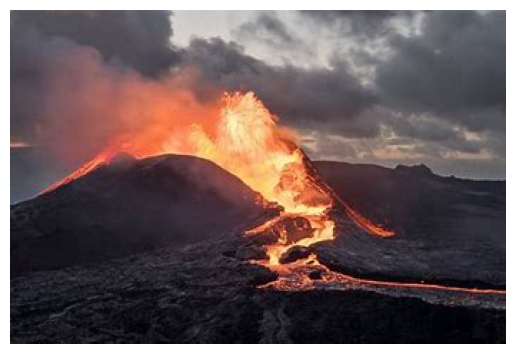

In [33]:
# define function to load an input image
def loadInputImage(input_path):
    # globals to store input width and height
    global input_w, input_h

    # use OpenCV to load the input image
    cap = cv2.VideoCapture(input_path)

    # store input width and height
    input_w = cap.get(3)
    input_h = cap.get(4)
    print(
        "Loaded input image [",
        input_path,
        "], resolution=",
        input_w,
        "w x ",
        input_h,
        "h",
    )

    # load the input image
    ret, image = cap.read()
    del cap
    return image


# define function for resizing input image
def resizeInputImage(image):
    # resize image dimensions form image to model's input w x h
    in_frame = cv2.resize(image, (w, h))
    # Change data layout from HWC to CHW
    in_frame = in_frame.transpose((2, 0, 1))
    # reshape to input dimensions
    in_frame = in_frame.reshape((n, c, h, w))
    print(f"Resized input image from {image.shape[:-1]} to {(h, w)}")
    return in_frame


# load image
image = loadInputImage(input_path)

# resize the input image
in_frame = resizeInputImage(image)

# display input image
print("Input image:")
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [34]:
# save start time
inf_start = time.time()

# run inference
res = exec_net.infer(inputs={input_blob: in_frame})

# calculate time from start until now
inf_time = time.time() - inf_start
print(f"Inference complete, run time: {inf_time * 1000:.3f} ms")
       

Inference complete, run time: 15.337 ms


Top  10  results for image ./Volcano.jpg :
Probability% is <label>
 0.9975018 % is volcano
 0.0008407 % is tent
 0.0002224 % is crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica
 0.0001991 % is vale
 0.0001827 % is crab, Cancer irroratus
 0.0001436 % is drop, drop-off
 0.0001363 % is headland, head, foreland
 0.0000619 % is crab
 0.0000612 % is iguana, iguana, Iguana iguana
 0.0000598 % is coast, seacoast, sea-coast


Processed and displayed inference output results.


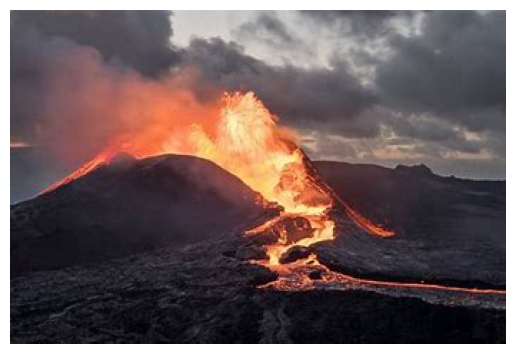

In [36]:
# create function to process inference results
def processAndDisplayResults(probs, orig_input_image, orig_input_path):
    # display image
    plt.figure()
    plt.axis("off")
    im_to_show = cv2.cvtColor(orig_input_image, cv2.COLOR_BGR2RGB)

    # report top n results for image
    print("Top ", report_top_n, " results for image", orig_input_path, ":")

    # remove dimensions of length=1
    probs = np.squeeze(probs)

    # sort then return top report_top_n entries
    top_ind = np.argsort(probs)[-report_top_n:][::-1]

    # show input image
    plt.imshow(im_to_show)

    # print out top probabilities, looking up label
    print("Probability% is <label>")
    for id in top_ind:
        det_label = labels_map[id] if labels_map else f"#{id}"
        print(f" {probs[id]:.7f} % is {det_label}")
    print("\n")


processAndDisplayResults(res[output_blob][0], image, input_path)
print("Processed and displayed inference output results.")

Loaded input image [ Balloons.jpg ], resolution= 1836.0 w x  3264.0 h
Resized input image from (3264, 1836) to (227, 227)
Top  10  results for image Balloons.jpg :
Probability% is <label>
 0.2569310 % is balloon
 0.2517880 % is abacus
 0.2386930 % is vase
 0.1664291 % is pinwheel
 0.0203406 % is necklace
 0.0137321 % is bank, penny bank
 0.0088254 % is goblet
 0.0067887 % is altar
 0.0060277 % is maraca
 0.0059916 % is taper, wax light




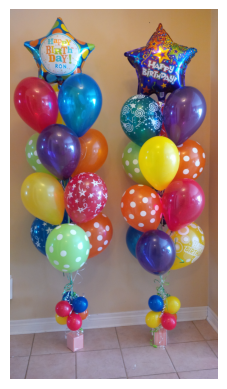

In [37]:
# define function to prepare input, run inference, and process inference results
def inferImage(image, input_path):
    # prepare input
    in_frame = resizeInputImage(image)

    # run inference
    res = exec_net.infer(inputs={input_blob: in_frame})

    # process inference results
    processAndDisplayResults(res[output_blob][0], image, input_path)


# set path to different input image
input_path = "Balloons.jpg"

# load input image
image = loadInputImage(input_path)

# infer image and display results
inferImage(image, input_path)

Loaded input image [ GrannyApple.jpg ], resolution= 1230.0 w x  852.0 h
Resized input image from (852, 1230) to (227, 227)
Top  10  results for image GrannyApple.jpg :
Probability% is <label>
 0.9974422 % is Smith
 0.0011326 % is pepper
 0.0007901 % is ball
 0.0002569 % is lemon
 0.0001489 % is banana
 0.0000831 % is squash
 0.0000809 % is fig
 0.0000238 % is acorn
 0.0000111 % is strawberry
 0.0000054 % is bank, penny bank




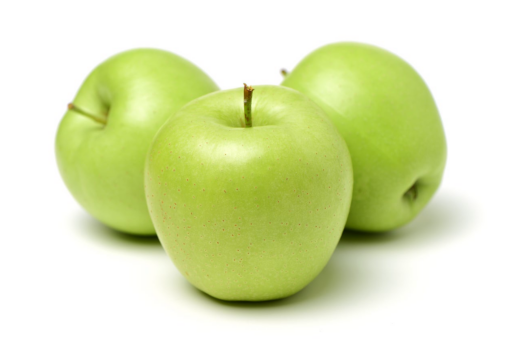

In [38]:
# input_path may be set to a local file or URL
input_path = "GrannyApple.jpg"

# load input image
image = loadInputImage(input_path)

# infer image and display results
inferImage(image, input_path)

Loaded input image [ Necklace.jpg ], resolution= 474.0 w x  474.0 h
Resized input image from (474, 474) to (227, 227)
Top  10  results for image Necklace.jpg :
Probability% is <label>
 0.5457299 % is chain
 0.2414457 % is knot
 0.2029322 % is necklace
 0.0037208 % is gecko
 0.0021349 % is snake, puff adder, sand viper
 0.0005751 % is spider, Araneus cavaticus
 0.0003763 % is mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour
 0.0003445 % is chameleon, Chamaeleo chamaeleon
 0.0002218 % is indris, Indri indri, Indri brevicaudatus
 0.0002088 % is cat, ring-tailed lemur, Lemur catta




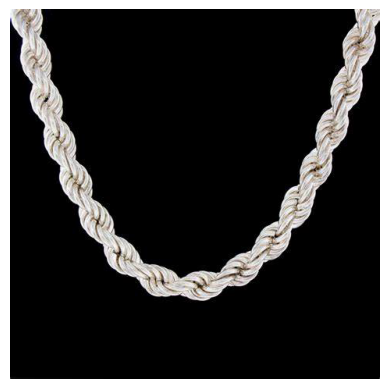

In [39]:
# input_path may be set to a local file or URL
input_path = "Necklace.jpg"

# load input image
image = loadInputImage(input_path)

# infer image and display results
inferImage(image, input_path)

In [40]:
# batch of inputs which may be local files or URLs (comma separated)
batch_paths = ["./Balloons.jpg", "./GrannyApple.jpg", "./Necklace.jpg", "./PunchingBag.jpg", "./Volcano.jpg"]


# define function to load input images into input batch
def batchLoadInputImages(batch_paths):
    global batch_size
    global batch_images
    global orig_image_paths
    global orig_images
    batch_size = len(batch_paths)

    # create input batch (array) of input images
    batch_images = np.ndarray(shape=(batch_size, c, h, w))

    # create array to hold original images and paths for displaying later
    orig_images = []
    orig_image_paths = []

    for i in range(batch_size):
        # load image
        image = loadInputImage(batch_paths[i])

        # save original image and path
        orig_images.append(image)
        orig_image_paths.append(batch_paths[i])

        # prepare input
        in_frame = resizeInputImage(image)

        # add input to batch
        batch_images[i] = in_frame
    return batch_size, batch_images, orig_image_paths, orig_images


batchLoadInputImages(batch_paths)
print("Loaded", batch_size, "images.")

Loaded input image [ ./Balloons.jpg ], resolution= 1836.0 w x  3264.0 h
Resized input image from (3264, 1836) to (227, 227)
Loaded input image [ ./GrannyApple.jpg ], resolution= 1230.0 w x  852.0 h
Resized input image from (852, 1230) to (227, 227)
Loaded input image [ ./Necklace.jpg ], resolution= 474.0 w x  474.0 h
Resized input image from (474, 474) to (227, 227)
Loaded input image [ ./PunchingBag.jpg ], resolution= 474.0 w x  474.0 h
Resized input image from (474, 474) to (227, 227)
Loaded input image [ ./Volcano.jpg ], resolution= 347.0 w x  234.0 h
Resized input image from (234, 347) to (227, 227)
Loaded 5 images.


In [41]:
# set the batch size to match the number of input images
net.batch_size = batch_size
print("Network batch size set to", batch_size)

## reload network because batch size has changed
exec_net = ie.load_network(network=net, num_requests=2, device_name=device)


# save start time
inf_start = time.time()

# run inference
res = exec_net.infer(inputs={input_blob: batch_images})

# calculate time from start until now
inf_time = time.time() - inf_start
print(f"Inference complete, run time: {inf_time * 1000:.3f} ms")

Network batch size set to 5
Inference complete, run time: 51.942 ms


Top  10  results for image ./Balloons.jpg :
Probability% is <label>
 0.2569310 % is balloon
 0.2517880 % is abacus
 0.2386930 % is vase
 0.1664291 % is pinwheel
 0.0203406 % is necklace
 0.0137321 % is bank, penny bank
 0.0088254 % is goblet
 0.0067887 % is altar
 0.0060277 % is maraca
 0.0059916 % is taper, wax light


Top  10  results for image ./GrannyApple.jpg :
Probability% is <label>
 0.9974422 % is Smith
 0.0011326 % is pepper
 0.0007901 % is ball
 0.0002569 % is lemon
 0.0001489 % is banana
 0.0000831 % is squash
 0.0000809 % is fig
 0.0000238 % is acorn
 0.0000111 % is strawberry
 0.0000054 % is bank, penny bank


Top  10  results for image ./Necklace.jpg :
Probability% is <label>
 0.5457299 % is chain
 0.2414457 % is knot
 0.2029322 % is necklace
 0.0037208 % is gecko
 0.0021349 % is snake, puff adder, sand viper
 0.0005751 % is spider, Araneus cavaticus
 0.0003763 % is mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour
 0.0003445 % is chameleon, Chamae

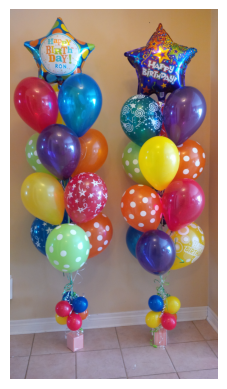

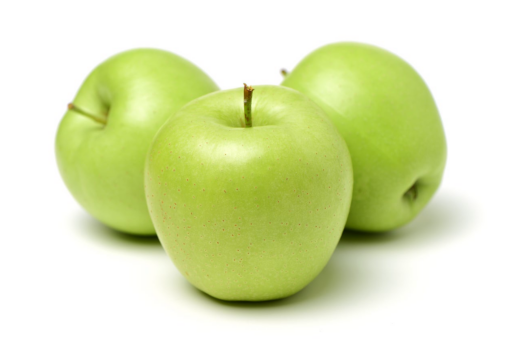

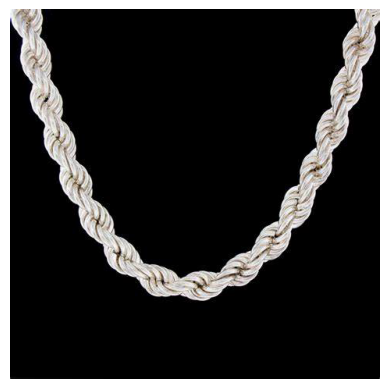

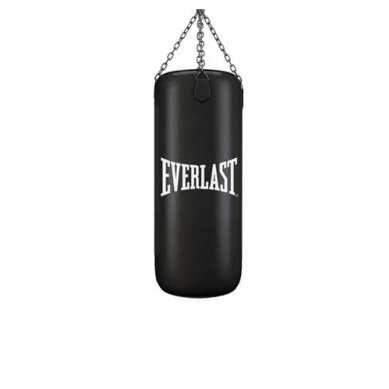

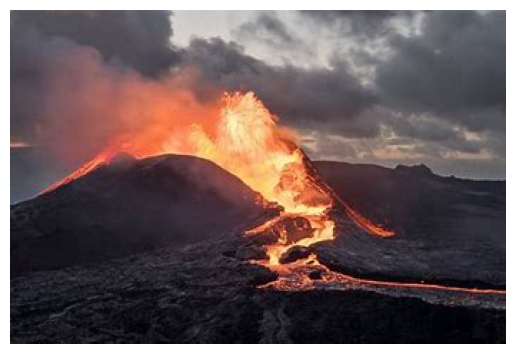

In [42]:
# create function to process inference results
def batchProcessAndDisplayResults(result, orig_input_images, orig_image_paths):
    # get output results
    res = result[output_blob]

    for i, probs in enumerate(res):
        processAndDisplayResults(probs, orig_input_images[i], orig_image_paths[i])


# process inference results
batchProcessAndDisplayResults(res, orig_images, orig_image_paths)

In [15]:
import numpy as np
import cv2

# Define image dimensions and channels (assuming example values)
c, h, w = 3, 224, 224  # Adjust to your model's expected input dimensions

# Batch of inputs which may be local files or URLs (comma separated)
batch_paths = ["./Balloons.jpg", "./GrannyApple.jpg", "./Necklace.jpg", "./PunchingBag.jpg", "./Volcano.jpg"]  # Ensure 5 images

# Define function to load and preprocess input images
def loadInputImage(path):
    """
    Load an image from a file path and return it.
    """
    image = cv2.imread(path)
    if image is None:
        raise ValueError(f"Image at path {path} could not be loaded.")
    return image

def resizeInputImage(image):
    """
    Resize and preprocess the image for the model's input layer.
    """
    image = cv2.resize(image, (w, h))
    image = image.transpose((2, 0, 1))  # HWC to CHW format
    image = image.astype(np.float32) / 255.0  # Normalize to [0, 1]
    return image

# Define function to load input images into input batch
def batchLoadInputImages(batch_paths):
    global batch_size
    global batch_images
    global orig_image_paths
    global orig_images

    if len(batch_paths) != 5:
        raise ValueError("Exactly 5 input paths are required.")
        
    batch_size = len(batch_paths)

    # Create input batch (array) of input images
    batch_images = np.ndarray(shape=(batch_size, c, h, w))

    # Create arrays to hold original images and paths for displaying later
    orig_images = []
    orig_image_paths = []

    for i in range(batch_size):
        # Load image
        image = loadInputImage(batch_paths[i])

        # Save original image and path
        orig_images.append(image)
        orig_image_paths.append(batch_paths[i])

        # Prepare input
        in_frame = resizeInputImage(image)

        # Add input to batch
        batch_images[i] = in_frame

    return batch_size, batch_images, orig_image_paths, orig_images

# Load and preprocess batch of inputs
batch_size, batch_images, orig_image_paths, orig_images = batchLoadInputImages(batch_paths)
print("Loaded", batch_size, "images.")


Loaded 5 images.


In [16]:
import time
from openvino.inference_engine import IECore
import matplotlib.pyplot as plt

In [43]:
# retrieve performance counters from last inference request
perf_counts = exec_net.requests[0].get_perf_counts()

# display performance counters for each layer
print("Performance counters:")
print(
    "{:<40} {:<15} {:<15} {:<15} {:<10}".format(
        "name", "layer_type", "exec_type", "status", "real_time, us"
    )
)
for layer, stats in perf_counts.items():
    print(
        "{:<40} {:<15} {:<15} {:<15} {:<10}".format(
            layer,
            stats["layer_type"],
            stats["exec_type"],
            stats["status"],
            stats["real_time"],
        )
    )

Performance counters:
name                                     layer_type      exec_type       status          real_time, us
Subtract_311                             Subgraph        jit_avx512_FP32 NOT_RUN         0         
Subtract_311_abcd_acdb_conv1/WithoutBiases Reorder         jit_uni_FP32    NOT_RUN         0         
conv1/WithoutBiases                      Convolution     brgconv_avx512_FP32 NOT_RUN         0         
conv10/WithoutBiases                     Convolution     brgconv_avx512_1x1_FP32 NOT_RUN         0         
data                                     Parameter       unknown_FP32    NOT_RUN         0         
fire2/concat                             Concat          ref_FP32        NOT_RUN         0         
fire2/expand1x1/WithoutBiases            Convolution     brgconv_avx512_1x1_FP32 NOT_RUN         0         
fire2/expand3x3/WithoutBiases            Convolution     brgconv_avx512_FP32 NOT_RUN         0         
fire2/relu_expand1x1                     Relu    